In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [7]:
sns.set_theme()

In [2]:
# Read data from csv files

bitcoin = pd.read_csv('../data/BCHAIN-MKPRU.csv', index_col='Date', parse_dates=True)
bitcoin.head()

,Value
Date,
2016-09-11,621.65
2016-09-12,609.67
2016-09-13,610.92
2016-09-14,608.82
2016-09-15,610.38


In [3]:
gold = pd.read_csv('../data/LBMA-GOLD.csv', index_col='Date', parse_dates=True)
gold.columns = ['Value']
gold.head()

,Value
Date,
2016-09-12,1324.60
2016-09-13,1323.65
2016-09-14,1321.75
2016-09-15,1310.80
2016-09-16,1308.35


In [15]:
all_index = pd.date_range('2016-9-12', '2021-9-10', freq='D')
gold = gold.reindex(all_index)
price = pd.concat([gold.fillna(method='pad'), bitcoin[1:]], axis=1)
price.columns = ['gold', 'bitcoin']
price

,gold,bitcoin
2016-09-12,1324.60,609.67
2016-09-13,1323.65,610.92
2016-09-14,1321.75,608.82
2016-09-15,1310.80,610.38
2016-09-16,1308.35,609.11
...,...,...
2021-09-06,1821.60,51769.06
2021-09-07,1802.15,52677.40
2021-09-08,1786.00,46809.17
2021-09-09,1788.25,46078.38


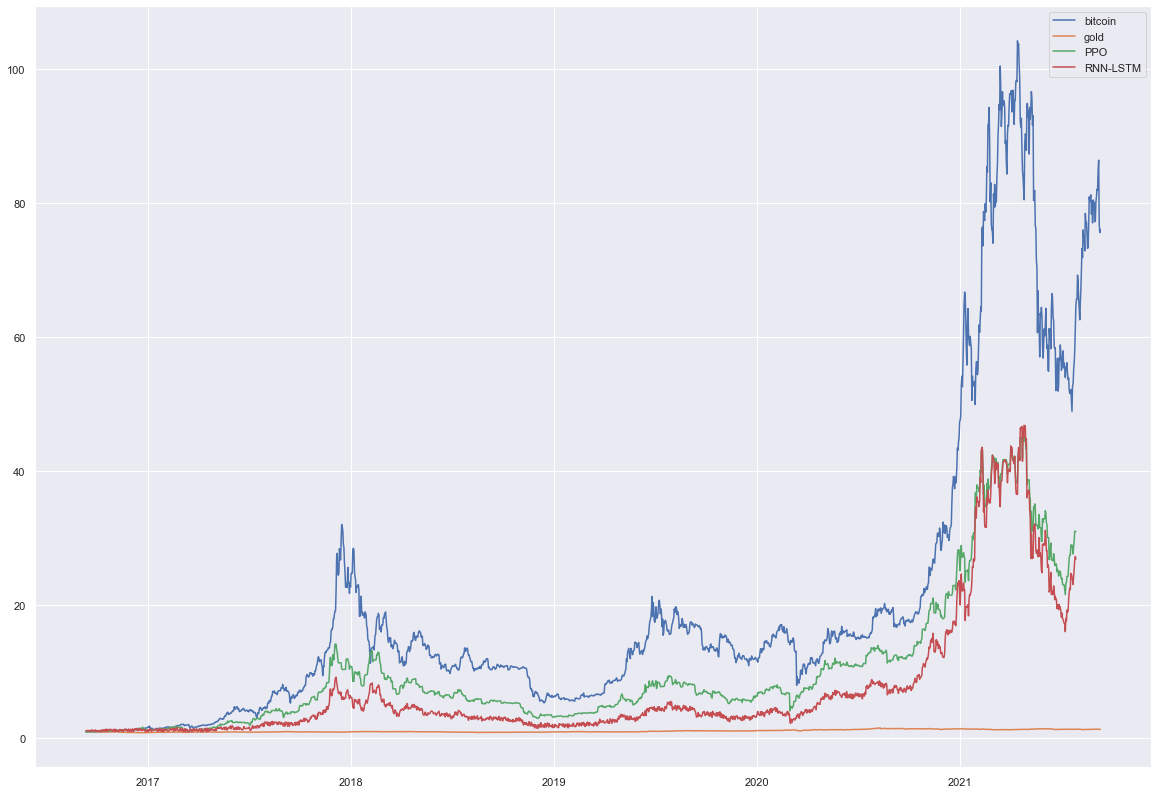

In [53]:
agent_score = np.load('../save/a.npy', allow_pickle=True)
rnn = []
for i in range(len(agent_score)):
    rnn.append(1 + np.sqrt(agent_score[i]) * agent_score[i] * 0.15 + (random.random() - 0.5) * np.log(i + 1) / 10)
rnn = np.array(rnn)
plt.figure(figsize=(20, 14))
plt.plot(price['bitcoin'] / price['bitcoin'][0], label='bitcoin')
plt.plot(price['gold'] / price['gold'][0], label='gold')
plt.plot(price.index[:1781], agent_score, label='PPO')
plt.plot(price.index[:1781], rnn, label='RNN-LSTM')
plt.legend()
plt.savefig('../img/final.svg', bbox_inches='tight')
